# Análisis de una solución de la ecuación del calor

La solución de la ecuación 
$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$
sujeta a las condiciones de frontera:
$$u_x(0,t)=u_x(1,t)=0, \;\;\; t>0$$

Y la condición inicial:

$$u(x,0)=f(x),\;\;\;0<x<1$$

Donde 


$$f(x)=\left\{\begin{array}{lcc}
             -2, &   si  &0< x \leq 1/2 \\
             \\ 0, &  si & 1/2 < x < 1 \\
             \end{array}
             \right.
             $$

Esta dada en términos de la serie de Fourier por la expresión:

$$u(x,t)=-1-\sum_{n=1}^{\infty}[\frac{4}{n\pi}sin(\frac{n\pi}{2})]cos(n\pi x)e^{-(n\pi)^2 t}$$

Este problema modela la transferencia de calor en una barra ideal delgada, con $k=1$.

In [1]:
from pylab import *
from matplotlib import animation,rc # biblioteca de animacion
from IPython.display import HTML # biblioteca para generar el video
%config InlineBackend.figure_format = 'retina'

Para empezar, graficamos la condición inicial.

In [2]:
def recta(x):
  y = zeros(len(x))
  for i in range(len(x)):
      if (x[i]<=1/2):
          y[i] = -2
      if (x[i]>1/2) and (x[i]<1):
          y[i] = 0
  return y

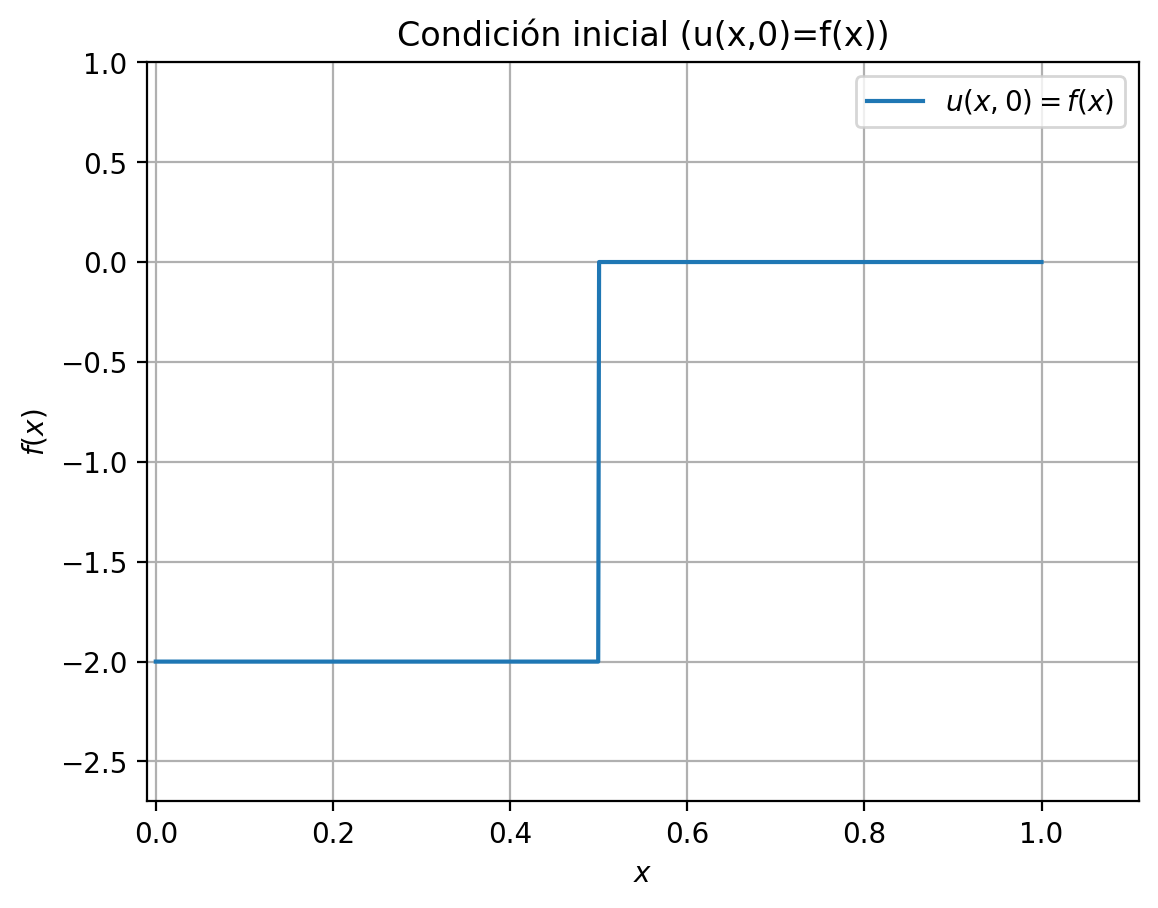

In [33]:
x = linspace(0,1,1000)
f = recta(x)
plot(x,f,label='$u(x,0)=f(x)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.01,1.11]),ylim([-2.7,1]),grid(),legend()
show()

Usamos una serie de Fourier para aproximar la condición inicial $u(x,0)=f(x)=\left\{\begin{array}{lcc}
             -2, &   si  &0< x \leq 1/2 \\
             \\ 0, &  si & 1/2 < x < 1 \\
             \end{array}
             \right.
             $.

In [4]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
      f += (-4/(n*pi))*sin(n*pi/2)*cos(n*pi*x)
       # f += (-1)**(n+1)*sin(n*pi*x)/(n)
    return f-1

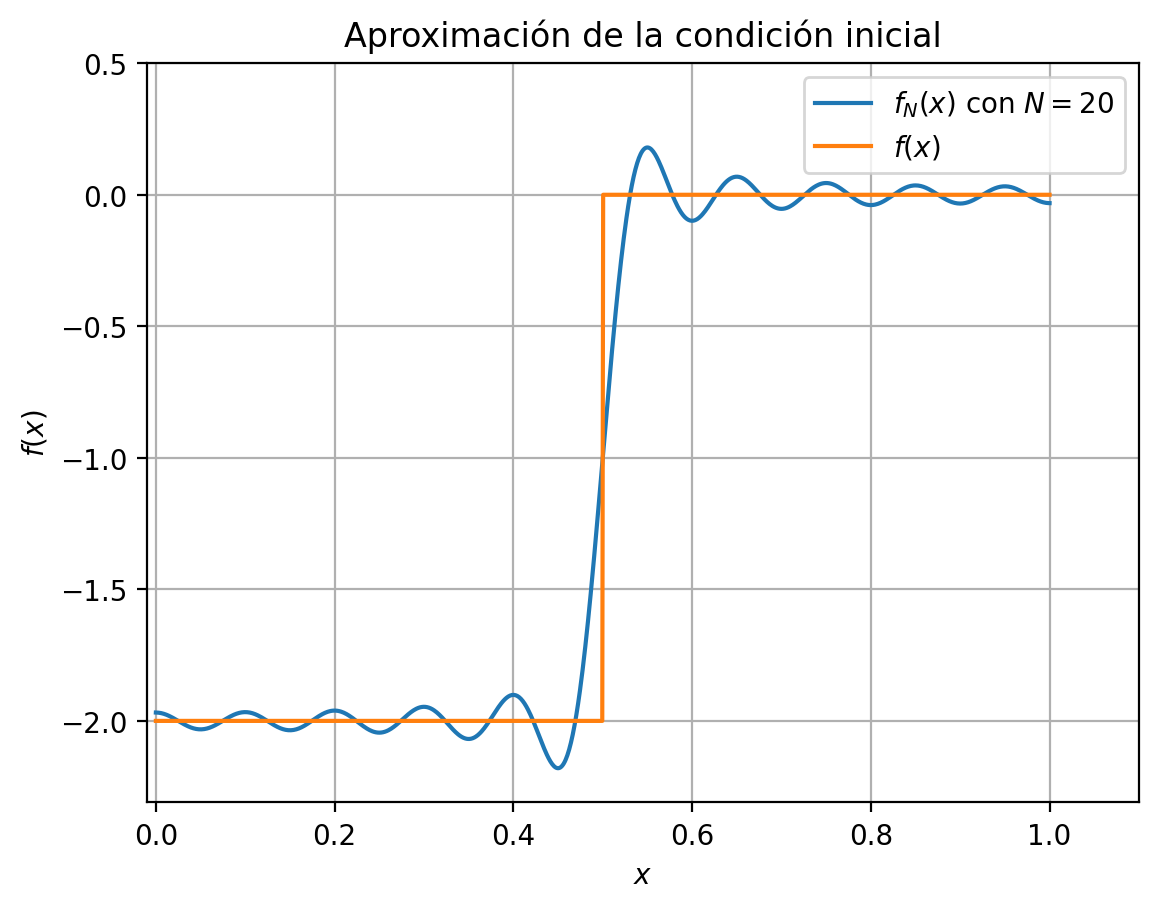

In [34]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f,label='$f(x)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-2.31,0.5]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

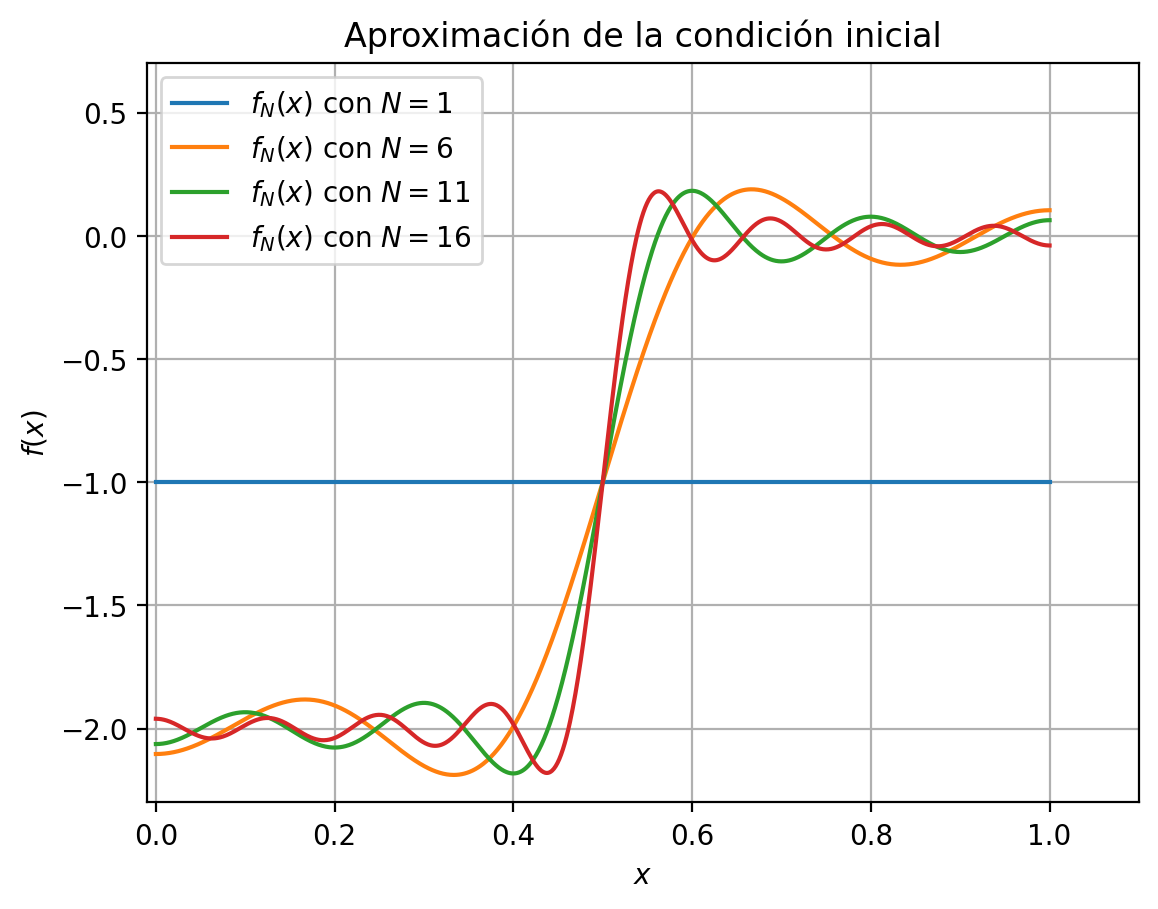

In [14]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-2.3,0.7]),grid(),legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$.

In [22]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += (4/(n*pi))*sin(n*pi/2)*cos(n*pi*x)*exp(-(n*pi)**2*t[i])
    return -1-f

In [23]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

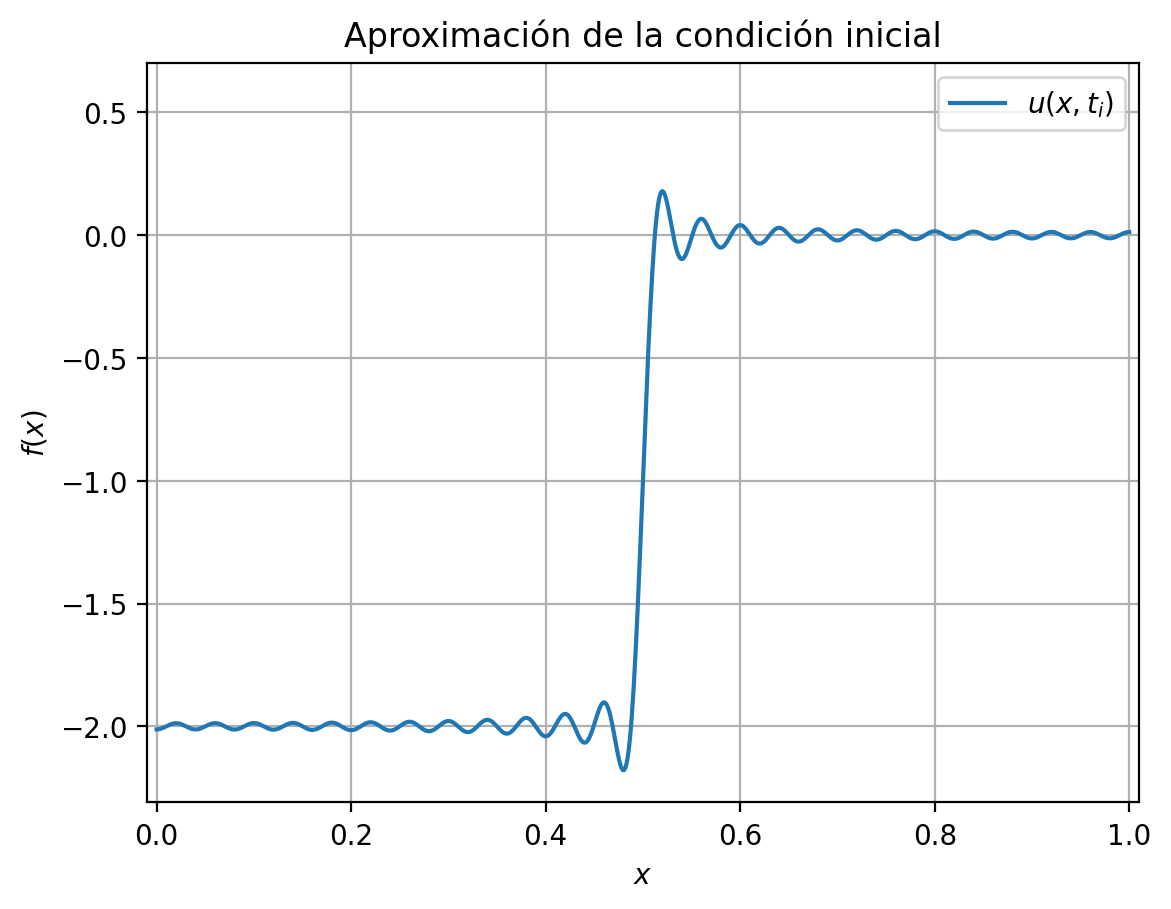

In [27]:
plot(x,U[:,0],label='$u(x,t_i)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-2.31,0.7]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

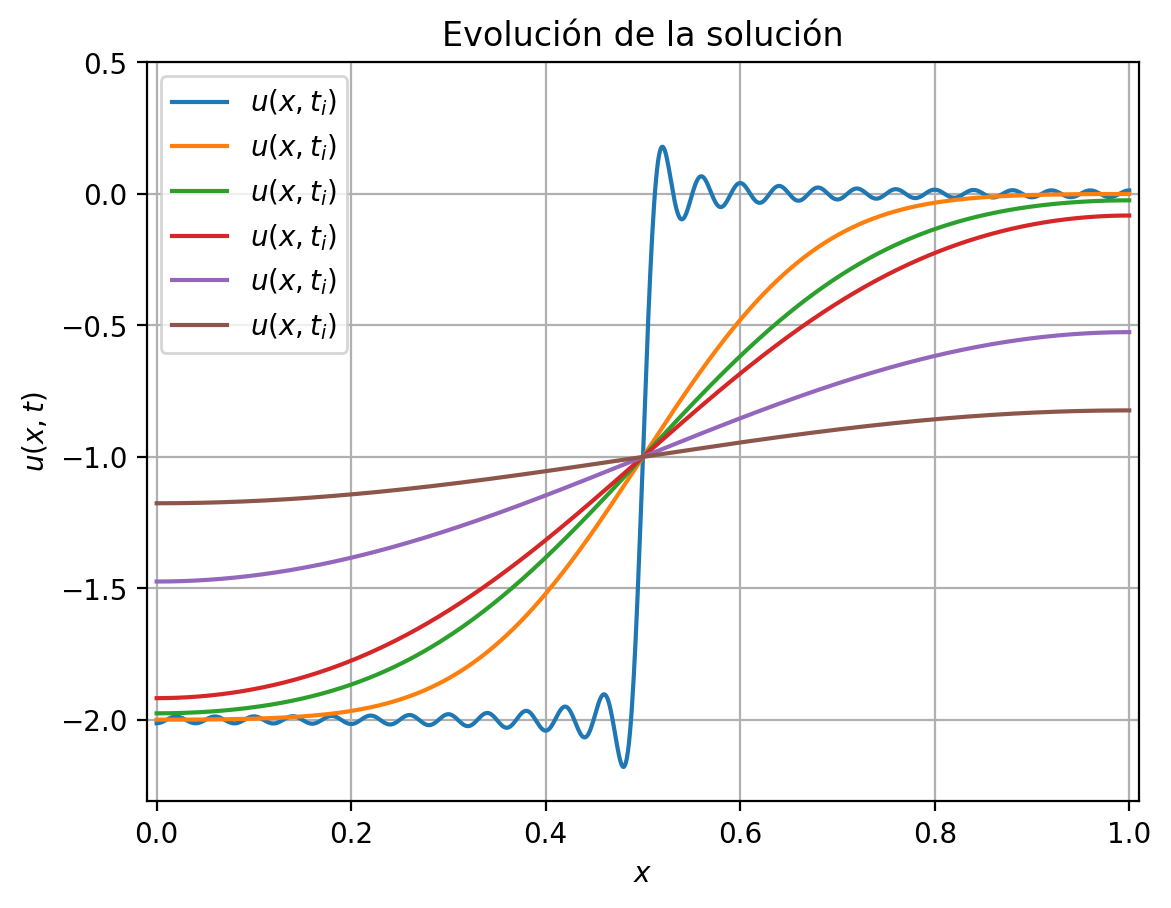

In [30]:
plot(x,U[:,0],label='$u(x,t_i)$') # Mejorar
plot(x,U[:,1],label='$u(x,t_i)$')
plot(x,U[:,2],label='$u(x,t_i)$')
plot(x,U[:,3],label='$u(x,t_i)$')
plot(x,U[:,10],label='$u(x,t_i)$')
plot(x,U[:,20],label='$u(x,t_i)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-2.31,0.5]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

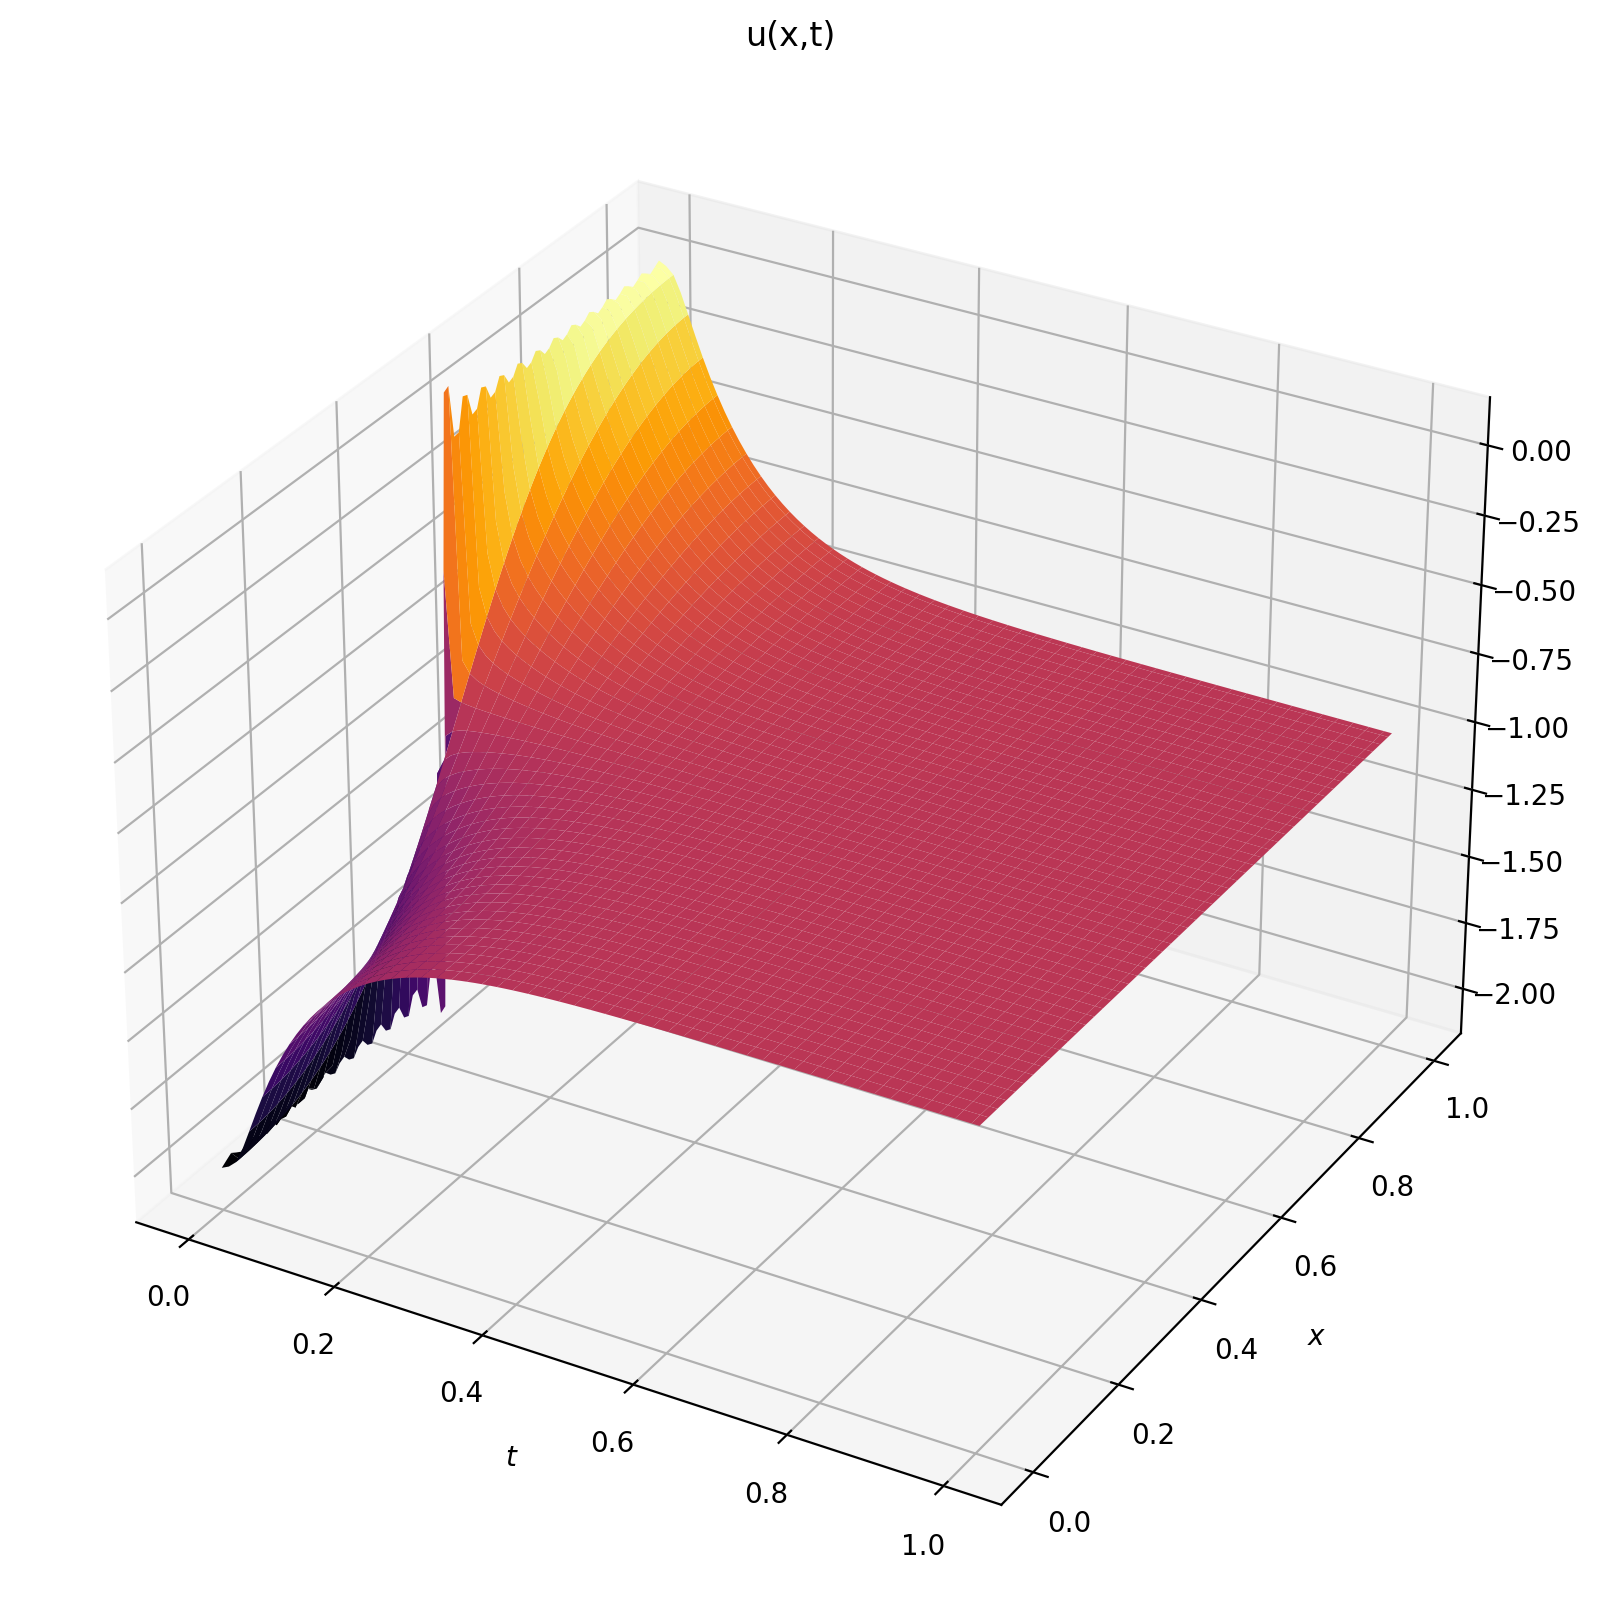

In [31]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="inferno"); #Otros colores:"viridis", "inferno", "plasma"